# Importing necessary library

In [36]:
import sys
sys.path.insert(0, '../src')
from terminal_script import read_data
from terminal_script import t_test_weather_quan
from terminal_script import t_test_weather_city
import importlib
importlib.reload(sys.modules['terminal_script'])

<module 'terminal_script' from '../src/terminal_script.py'>

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Rolling 12-months data

In [3]:
df_02 = read_data('../data/2019_02_ALL.csv')
df_03 = read_data('../data/2019_03_ALL.csv')
df_04 = read_data('../data/2019_04_ALL.csv')
df_05 = read_data('../data/2019_05_ALL.csv')
df_06 = read_data('../data/2019_06_ALL.csv')
df_07 = read_data('../data/2019_07_ALL.csv')
df_08 = read_data('../data/2019_08_ALL.csv')
df_09 = read_data('../data/2019_09_ALL.csv')
df_10 = read_data('../data/2019_10_ALL.csv')
df_11 = read_data('../data/2019_11_ALL.csv')
df_12 = read_data('../data/2019_12_ALL.csv')
df_01 = read_data('../data/2020_01_ALL.csv')

In [5]:
frames = [df_02,df_03,df_04,df_05,df_06,df_07,df_08,df_09,df_10,df_11,df_12,df_01]

In [6]:
df_one_year = pd.concat(frames)

# Integrating Weather Data

In [44]:
df_weather = pd.read_csv('../data/19_02_20_01_SFO_DAILY.csv', usecols=['DATE','AWND','PRCP','TAVG','WT01','WT02','WT03','WT08'], parse_dates=['DATE'])

In [45]:
df_weather.columns = ["date", "avg_wind_spd", "precip", "avg_temp", "fog", "heavy_fog", "thunder", "smoke_haze"]

In [46]:
df_weather.fillna(value=0, inplace=True)

In [ ]:
df_weather.head(5)

In [47]:
df_sfo = df_one_year[df_one_year['ORIGIN_CITY_NAME'] == "San Francisco, CA"]

In [48]:
df_sfo_pivot = df_sfo.groupby(['ORIGIN_CITY_NAME','FL_DATE']).agg(
    total_flight=pd.NamedAgg(column='DEP_DELAY',aggfunc='count'),
    avg_delay_min=pd.NamedAgg(column='DEP_DELAY',aggfunc='mean'),
    cancelled_count=pd.NamedAgg(column='CANCELLED',aggfunc='sum'),
)
df_sfo_pivot = df_sfo_pivot.reset_index()
df_sfo_pivot['FL_DATE'] = pd.to_datetime(df_sfo_pivot['FL_DATE'])

In [ ]:
df_sfo_pivot.sample(5)

In [49]:
df_combined = df_sfo_pivot.join(df_weather.set_index('date'),on='FL_DATE')

In [ ]:
df_combined.head(5)

In [50]:
df_combined['cancel_rate'] = df_combined['cancelled_count'] / df_combined['total_flight']

In [ ]:
df_combined.corr()

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(16,10))
sns.set(font_scale=1.5)

sns.stripplot(x="fog",y="cancel_rate",data=df_combined,jitter=True,ax=axes[0, 0],palette='icefire')
sns.stripplot(x="heavy_fog",y="cancel_rate",data=df_combined,jitter=True,ax=axes[0, 1],palette='icefire')
sns.stripplot(x="thunder",y="cancel_rate",data=df_combined,jitter=True,ax=axes[1, 0],palette='icefire')
sns.stripplot(x="smoke_haze",y="cancel_rate",data=df_combined,jitter=True,ax=axes[1, 1],palette='icefire')

axes[0,0].set_xticklabels(['No', 'Yes'])
axes[0,0].set(xlabel="",ylabel="Cancellation rate")
axes[0,0].set_title('Fog')
axes[0,1].set_xticklabels(['No', 'Yes'])
axes[0,1].set(xlabel="",ylabel="Cancellation rate")
axes[0,1].set_title('Heavy Fog')
axes[1,0].set_xticklabels(['No', 'Yes'])
axes[1,0].set(xlabel="",ylabel="Cancellation rate")
axes[1,0].set_title('Thunder')
axes[1,1].set_xticklabels(['No', 'Yes'])
axes[1,1].set(xlabel="",ylabel="Cancellation rate")
axes[1,1].set_title('Smoke_Haze')

plt.figtext(.5,.925,'SFO - Cancellation Rate & Qualitative Weather Conditions', fontsize=20, ha='center')

plt.savefig('../img/cancel_weather_SFO.png', bbox_inches = "tight")

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(16,10))
sns.set(font_scale=1.5)

sns.stripplot(x="fog",y="avg_delay_min",data=df_combined,jitter=True,ax=axes[0, 0])
sns.stripplot(x="heavy_fog",y="avg_delay_min",data=df_combined,jitter=True,ax=axes[0, 1])
sns.stripplot(x="thunder",y="avg_delay_min",data=df_combined,jitter=True,ax=axes[1, 0])
sns.stripplot(x="smoke_haze",y="avg_delay_min",data=df_combined,jitter=True,ax=axes[1, 1])

axes[0,0].set_xticklabels(['No', 'Yes'])
axes[0,0].set(xlabel="",ylabel="Avg delay (mins)")
axes[0,0].set_title('Fog')
axes[0,1].set_xticklabels(['No', 'Yes'])
axes[0,1].set(xlabel="",ylabel="Avg delay (mins)")
axes[0,1].set_title('Heavy Fog')
axes[1,0].set_xticklabels(['No', 'Yes'])
axes[1,0].set(xlabel="",ylabel="Avg delay (mins)")
axes[1,0].set_title('Thunder')
axes[1,1].set_xticklabels(['No', 'Yes'])
axes[1,1].set(xlabel="",ylabel="Avg delay (mins)")
axes[1,1].set_title('Smoke_Haze')

plt.figtext(.5,.925,'SFO - Average Delay Time & Qualitative Weather Conditions', fontsize=20, ha='center')

plt.savefig('../img/delay_weather_SFO.png', bbox_inches = "tight")

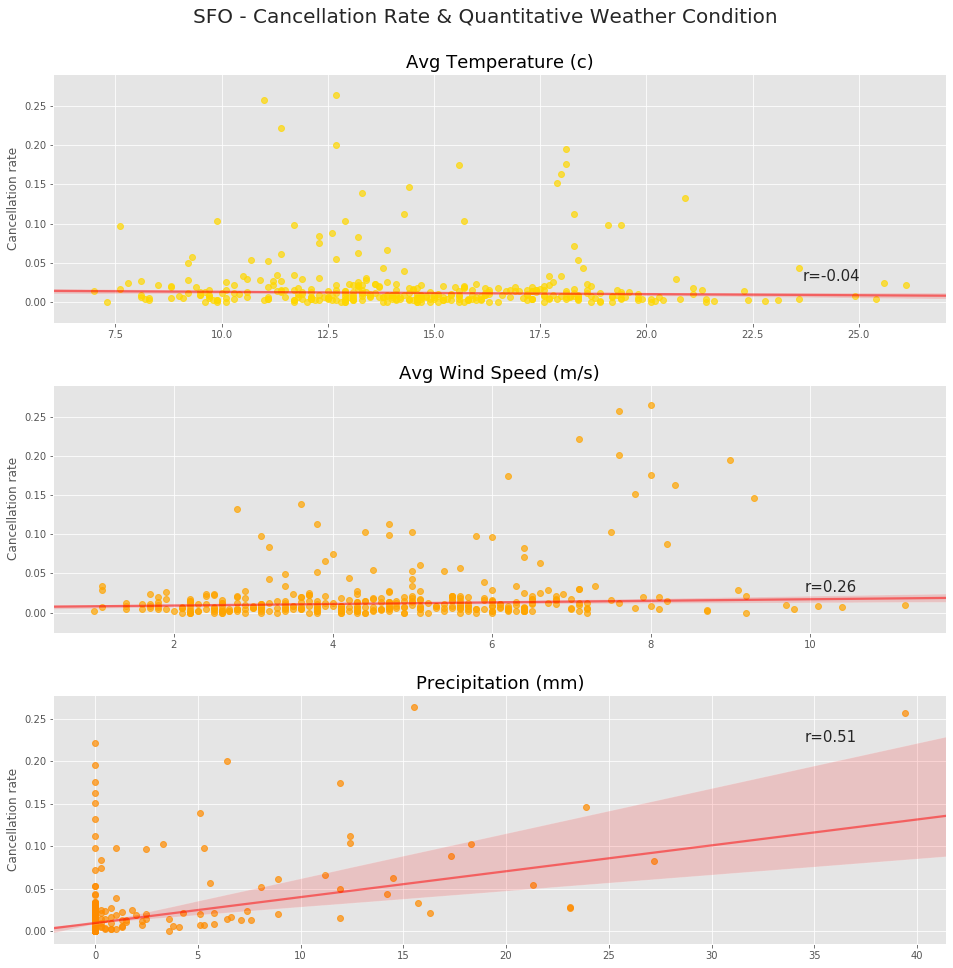

In [54]:
fig, axes = plt.subplots(3,1,figsize=(16,16))
sns.set(font_scale=1.5)

sns.regplot(x='avg_temp',y='cancel_rate',data=df_combined,robust=True, scatter_kws = {'color': 'gold', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5},ax=axes[0])
sns.regplot(x='avg_wind_spd',y='cancel_rate',data=df_combined,robust=True, scatter_kws = {'color': 'orange', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5},ax=axes[1])
sns.regplot(x='precip',y='cancel_rate',data=df_combined,robust=True, scatter_kws = {'color': 'darkorange', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5},ax=axes[2])

axes[0].set(xlabel="",ylabel="Cancellation rate")
axes[0].set_title('Avg Temperature (c)')
axes[1].set(xlabel="",ylabel="Cancellation rate")
axes[1].set_title('Avg Wind Speed (m/s)')
axes[2].set(xlabel="",ylabel="Cancellation rate")
axes[2].set_title('Precipitation (mm)')

plt.figtext(.5,.925,'SFO - Cancellation Rate & Quantitative Weather Condition', fontsize=20, ha='center')
plt.figtext(.8,.7,'r=-0.04', fontsize=15, ha='center')
plt.figtext(.8,.43,'r=0.26', fontsize=15, ha='center')
plt.figtext(.8,.3,'r=0.51', fontsize=15, ha='center')

plt.subplots_adjust(hspace = 0.25)

plt.savefig('../img/cancel_weather_SFO_2.png', bbox_inches = "tight")

In [ ]:
fig, axes = plt.subplots(3,1,figsize=(16,16))
sns.set(font_scale=1.5)

sns.regplot(x='avg_temp',y='avg_delay_min',data=df_combined,robust=True, scatter_kws = {'color': 'mediumaquamarine', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5},ax=axes[0])
sns.regplot(x='avg_wind_spd',y='avg_delay_min',data=df_combined,robust=True, scatter_kws = {'color': 'steelblue', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5},ax=axes[1])
sns.regplot(x='precip',y='avg_delay_min',data=df_combined,robust=True, scatter_kws = {'color': 'cadetblue', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5},ax=axes[2])

axes[0].set(xlabel="",ylabel="Avg delay (min)")
axes[0].set_title('Avg Temperature (c)')
axes[1].set(xlabel="",ylabel="Avg delay (min)")
axes[1].set_title('Avg Wind Speed (m/s)')
axes[2].set(xlabel="",ylabel="Avg delay (min)")
axes[2].set_title('Precipitation (mm)')

plt.figtext(.5,.925,'SFO - Average Delay Time & Quantitative Weather Condition', fontsize=20, ha='center')
plt.figtext(.8,.71,'r=-0.09', fontsize=15, ha='center')
plt.figtext(.8,.45,'r=0.19', fontsize=15, ha='center')
plt.figtext(.8,.32,'r=.52', fontsize=15, ha='center')

plt.subplots_adjust(hspace = 0.25)

plt.savefig('../img/delay_weather_SFO_2.png', bbox_inches = "tight")

# More Weather

In [7]:
sfo_weather = pd.read_csv('../data/19_02_20_01_SFO_DAILY.csv', usecols=['NAME','DATE','AWND','PRCP','TAVG','WT01','WT02','WT03','WT08'], parse_dates=['DATE'])
other_ca_weather = pd.read_csv('../data/19_02_20_01_LA_OAK_SJ_SD_DAILY.csv', usecols=['NAME','DATE','AWND','PRCP','TAVG','WT01','WT02','WT03','WT08'], parse_dates=['DATE'])

In [ ]:
sfo_weather.head()

In [ ]:
other_ca_weather.head()

In [8]:
ca_five_weather_df = sfo_weather.append(other_ca_weather)

In [9]:
ca_five_weather_df.columns = ["city","date", "avg_wind_spd", "precip", "avg_temp", "fog", "heavy_fog", "thunder", "smoke_haze"]

In [ ]:
ca_five_weather_df.head()

In [10]:
ca_five_weather_df.fillna(value=0, inplace=True)

In [ ]:
ca_five_weather_df['city'].unique()

In [11]:
ca_five_weather_dict = {'LOS ANGELES INTERNATIONAL AIRPORT, CA US':'Los Angeles, CA','OAKLAND METROPOLITAN, CA US':'Oakland, CA','SAN FRANCISCO INTERNATIONAL AIRPORT, CA US': 'San Francisco, CA','SAN DIEGO INTERNATIONAL AIRPORT, CA US': 'San Diego, CA','SAN JOSE, CA US': 'San Jose, CA'}
ca_five_weather_df.replace(to_replace={'city': ca_five_weather_dict}, inplace=True)
ca_five_weather_df.sample(5)

,city,date,avg_wind_spd,precip,avg_temp,fog,heavy_fog,thunder,smoke_haze
723,"Los Angeles, CA",2020-01-26,4.70,0.00,58.0,1.0,0.0,0.0,1.0
299,"Oakland, CA",2019-11-27,8.95,0.20,0.0,0.0,0.0,0.0,0.0
536,"Los Angeles, CA",2019-07-23,8.28,0.05,70.0,1.0,0.0,1.0,0.0
249,"Oakland, CA",2019-10-08,5.82,0.00,0.0,0.0,0.0,0.0,0.0
288,"Oakland, CA",2019-11-16,2.46,0.00,0.0,1.0,1.0,0.0,1.0


In [12]:
ca_five_list = ['Los Angeles, CA','Oakland, CA','San Francisco, CA','San Diego, CA','San Jose, CA']
ca_five_filtered = df_one_year[df_one_year['ORIGIN_CITY_NAME'].isin(ca_five_list)]

In [13]:
ca_five_pivot = ca_five_filtered.groupby(['ORIGIN_CITY_NAME','FL_DATE']).agg(
    total_flight=pd.NamedAgg(column='DEP_DELAY',aggfunc='count'),
    avg_delay_min=pd.NamedAgg(column='DEP_DELAY',aggfunc='mean'),
    cancelled_count=pd.NamedAgg(column='CANCELLED',aggfunc='sum'),
).reset_index()
ca_five_pivot['FL_DATE'] = pd.to_datetime(ca_five_pivot['FL_DATE'])

In [14]:
ca_five_pivot['cancel_rate'] = ca_five_pivot['cancelled_count'] / ca_five_pivot['total_flight']

In [15]:
ca_five_flight_weather = pd.merge(ca_five_pivot,ca_five_weather_df,left_on=['ORIGIN_CITY_NAME','FL_DATE'],right_on=['city','date'],validate='1:1')

In [ ]:
ca_five_flight_weather.sample(5)

In [ ]:
ca_five_flight_weather_pivot = ca_five_flight_weather.groupby(['ORIGIN_CITY_NAME']).agg(
    total_flight_year = pd.NamedAgg(column='total_flight',aggfunc='sum'),
    fog_count = pd.NamedAgg(column='fog',aggfunc='sum'),
    heavy_fog_count = pd.NamedAgg(column='heavy_fog',aggfunc='sum'),
    thunder_count = pd.NamedAgg(column='thunder',aggfunc='sum'),
    smoke_haze_count = pd.NamedAgg(column='smoke_haze',aggfunc='sum'),
).reset_index()

In [ ]:
ca_five_flight_weather_pivot

In [ ]:
ca_five_flight_weather_pivot['fog_rate'] = ca_five_flight_weather_pivot['fog_count'] / 365
ca_five_flight_weather_pivot['heavy_fog_rate'] = ca_five_flight_weather_pivot['heavy_fog_count'] / 365
ca_five_flight_weather_pivot['thunder_rate'] = ca_five_flight_weather_pivot['thunder_count'] / 365
ca_five_flight_weather_pivot['smoke_haze_rate'] = ca_five_flight_weather_pivot['smoke_haze_count'] / 365

In [ ]:
ca_five_flight_weather_pivot

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,12))
sns.set(font_scale=1.3)

sns.barplot(x='ORIGIN_CITY_NAME',y='fog_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[0])
# sns.barplot(x='ORIGIN_CITY_NAME',y='heavy_fog_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[0,1])
# sns.barplot(x='ORIGIN_CITY_NAME',y='thunder_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[1,0])
sns.barplot(x='ORIGIN_CITY_NAME',y='smoke_haze_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[1])

axes[0].set(ylabel="% of days with fog")
axes[0].set_title('Fog')
# axes[0,1].set(ylabel="% of days with heavy fog")
# axes[0,1].set_title('Heavy Fog')
# axes[1,0].set(ylabel="% of days with thunder")
# axes[1,0].set_title('Thunder')
axes[1].set(ylabel="% of days with smoke or haze")
axes[1].set_title('Smoke or Haze')
for ax in fig.axes:
    ax.set_xlabel(' ')
    plt.setp(ax.get_xticklabels(), rotation=20, horizontalalignment='center')
plt.figtext(.5,.93,'Selected CA Airports - Weather Conditions Occurence Rate', fontsize=20, ha='center')
plt.subplots_adjust(wspace = 0.25, hspace = 0.3)
plt.savefig('../img/weather_CA_2.png', bbox_inches = "tight")

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(16,12))
sns.set(font_scale=1.2)

sns.barplot(x='ORIGIN_CITY_NAME',y='fog_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[0,0])
sns.barplot(x='ORIGIN_CITY_NAME',y='heavy_fog_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[0,1])
sns.barplot(x='ORIGIN_CITY_NAME',y='thunder_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[1,0])
sns.barplot(x='ORIGIN_CITY_NAME',y='smoke_haze_rate',data=ca_five_flight_weather_pivot.sort_values('total_flight_year',ascending=False),palette='ocean',ax=axes[1,1])

axes[0,0].set(ylabel="% of days with fog")
axes[0,0].set_title('Fog')
axes[0,0].set_xlabel(' ')
axes[0,1].set(ylabel="% of days with heavy fog")
axes[0,1].set_title('Heavy Fog')
axes[1,0].set(ylabel="% of days with thunder")
axes[1,0].set_title('Thunder')
axes[1,1].set(ylabel="% of days with smoke or haze")
axes[1,1].set_title('Smoke or Haze')
for ax in fig.axes:
    ax.set_xlabel(' ')
    plt.setp(ax.get_xticklabels(), rotation=20, horizontalalignment='center')
plt.figtext(.5,.93,'Selected CA Airports - Weather Conditions Occurence Rate', fontsize=20, ha='center')
plt.subplots_adjust(wspace = 0.25, hspace = 0.3)
plt.savefig('../img/weather_CA.png', bbox_inches = "tight")

# More t-test about weather

In [ ]:
ca_five_flight_weather

### LAX weather conditions and cancellation rate

In [ ]:
lax_df =  ca_five_flight_weather[ca_five_flight_weather['ORIGIN_CITY_NAME'] == 'Los Angeles, CA']

In [34]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(lax_df,'fog','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

NameError: name 'lax_df' is not defined

In [ ]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(lax_df,'heavy_fog','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

In [ ]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(lax_df,'thunder','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

In [ ]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(lax_df,'smoke_haze','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

### SFO and weather condition

In [16]:
sfo_df =  ca_five_flight_weather[ca_five_flight_weather['ORIGIN_CITY_NAME'] == 'San Francisco, CA']

In [37]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(sfo_df,'fog','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

138 227
16.67798694165874 11.102852222334388
1.4246622846616341
3.9133026678308407 6.290298213264961e-05


In [38]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(sfo_df,'heavy_fog','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

7 358
21.40148782123951 13.050556529804853
3.512412931910615
2.3775482704683237 0.026148160199895513


In [39]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(sfo_df,'thunder','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

6 359
43.42882753505658 12.70567322342194
7.385401129307606
4.159984511838558 0.004291315517956726


In [40]:
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_quan(sfo_df,'smoke_haze','avg_delay_min')
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

201 164
14.381992181107 11.77517819522138
1.2065631572323254
2.160528415160014 0.015706469058247283


Verify with scipy

In [41]:
a = ca_five_flight_weather[(ca_five_flight_weather['ORIGIN_CITY_NAME'] == 'San Francisco, CA') & (ca_five_flight_weather['fog'] == 1)]['avg_delay_min']
b = ca_five_flight_weather[(ca_five_flight_weather['ORIGIN_CITY_NAME'] == 'San Francisco, CA') & (ca_five_flight_weather['fog'] == 0)]['avg_delay_min']
scs.ttest_ind(a,b,equal_var=False)

Ttest_indResult(statistic=3.9133026678308456, pvalue=0.00012580596426529727)

In [42]:
a = ca_five_flight_weather[(ca_five_flight_weather['ORIGIN_CITY_NAME'] == 'San Francisco, CA') & (ca_five_flight_weather['smoke_haze'] == 1)]['avg_delay_min']
b = ca_five_flight_weather[(ca_five_flight_weather['ORIGIN_CITY_NAME'] == 'San Francisco, CA') & (ca_five_flight_weather['smoke_haze'] == 0)]['avg_delay_min']
scs.ttest_ind(a,b,equal_var=False)

Ttest_indResult(statistic=2.160528415160007, pvalue=0.03141293811649509)

### t-test between cities

In [ ]:
city1 = 'San Francisco, CA'
city2 = 'Los Angeles, CA'
condition = 'fog'
cond_flag = 1
col = 'avg_delay_min'
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_city(ca_five_flight_weather, city1, city2, condition , cond_flag,col)
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

In [ ]:
city1 = 'San Francisco, CA'
city2 = 'Los Angeles, CA'
condition = 'fog'
cond_flag = 0
col = 'avg_delay_min'
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_city(ca_five_flight_weather, city1, city2, condition , cond_flag,col)
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

In [ ]:
city1 = 'San Francisco, CA'
city2 = 'Oakland, CA'
condition = 'fog'
cond_flag = 1
col = 'avg_delay_min'
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_city(ca_five_flight_weather, city1, city2, condition , cond_flag,col)
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

In [ ]:
city1 = 'San Francisco, CA'
city2 = 'Oakland, CA'
condition = 'fog'
cond_flag = 0
col = 'avg_delay_min'
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_city(ca_five_flight_weather, city1, city2, condition , cond_flag,col)
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

In [ ]:
city1 = 'San Francisco, CA'
city2 = 'San Jose, CA'
condition = 'fog'
cond_flag = 1
col = 'avg_delay_min'
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_city(ca_five_flight_weather, city1, city2, condition , cond_flag,col)
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)

In [ ]:
city1 = 'San Francisco, CA'
city2 = 'San Jose, CA'
condition = 'fog'
cond_flag = 0
col = 'avg_delay_min'
N1, N2, Mean1, Mean2, a_b_std, t_score, p_val = t_test_weather_city(ca_five_flight_weather, city1, city2, condition , cond_flag,col)
print(N1, N2)
print(Mean1, Mean2)
print(a_b_std)
print(t_score, p_val/2)